# Ford GoBike Ride Frequencies per User Type and Gender
## by Wafula Abdalah Hassani

## Investigation Overview


In this investigation, I wanted assess how Rides frequencies vary by categorical features. The main focus was put on user type, time of the day, day of the week and member gender.


## Dataset Overview

The dataset consists of information regarding 183,412 individual rides made in Bike sharing system covering the San Francisco Bay area. The dataset consists of features such as Customer type, gender, ride durations and other additional variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
bikes_df = pd.read_csv('ford-gobikes.csv')

bikes_df_clean = bikes_df.copy()

In [5]:
bikes_df_clean.dropna(inplace=True)

# Converting start_time, end_time columns
bikes_df_clean['start_time'] = pd.to_datetime(bikes_df_clean['start_time'])
bikes_df_clean['end_time'] = pd.to_datetime(bikes_df_clean['end_time'])

# Converting bike_id column
bikes_df_clean['bike_id'] = bikes_df_clean.bike_id.astype(str)

# Converting member_birth_year column to int
bikes_df_clean['member_birth_year'] = bikes_df_clean.member_birth_year.astype(int)

# Extracting the day, month and year columns from the dates fields
import datetime as dt
bikes_df_clean['start_day'] = bikes_df_clean['start_time'].dt.day_name()
bikes_df_clean['start_month'] = bikes_df_clean['start_time'].dt.month_name()
bikes_df_clean['start_hour'] = bikes_df_clean['start_time'].dt.hour
bikes_df_clean['start_hour'] = bikes_df_clean['start_hour'].astype(str)

bikes_df_clean['end_day'] = bikes_df_clean['end_time'].dt.day_name()
bikes_df_clean['end_month'] = bikes_df_clean['end_time'].dt.month_name()
bikes_df_clean['end_hour'] = bikes_df_clean['end_time'].dt.hour
bikes_df_clean['end_hour'] = bikes_df_clean['end_hour'].astype(str)

# converting duration from seconds to minutes 
bikes_df_clean['duration_min'] = bikes_df_clean['duration_sec'] / 60

In [6]:
# converting days and hours into ordered categorical types

var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
            'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
            'start_hour': [str(i) for i in range(0,24)],
            'end_hour': [str(i) for i in range(0,24)]}

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_dict[var])
    
    bikes_df_clean[var] = bikes_df_clean[var].astype(ordered_var)

## Rides Frequency per day

More trips were made on Weekdays (Monday - Friday) as compared to weekends (Saturday - Sunday) and a high volume of trips were recorded on Thursday.

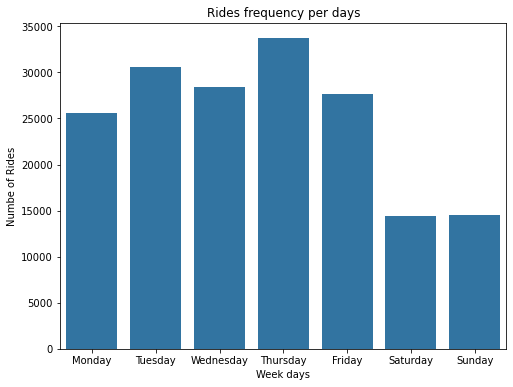

In [9]:
# Rides frequency per days
fig = plt.figure(figsize=[8,6])

default_color = sb.color_palette()[0]
sb.countplot(data = bikes_df_clean, x = 'start_day', color = default_color)
plt.title('Rides frequency per days')
plt.ylabel('Numbe of Rides')
plt.xlabel('Week days')
plt.show();

## Rides Frequency per hour

High peaks were recorded in the morning hours i.e. 8AM and 9AM and evening hours i.e. 4PM - 6PM. This showed that more trips were made before and after office/working hours. A substanstial decline in trips recorded was observed in hours after 6PM

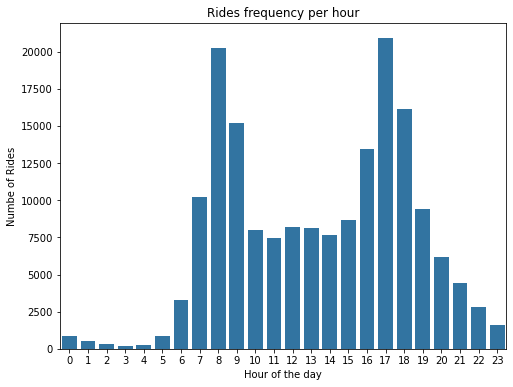

In [10]:
# Rides frequency per hour
fig = plt.figure(figsize=[8,6])

color = sb.color_palette()[0]
sb.countplot(data = bikes_df_clean, x = 'start_hour', color = color)
plt.title('Rides frequency per hour')
plt.ylabel('Numbe of Rides')
plt.xlabel('Hour of the day')
plt.show();

## Rides Frequency per User Type

Majority of the users are Subscribers accounting to over 90% with a substantial difference to Customers of ~9%

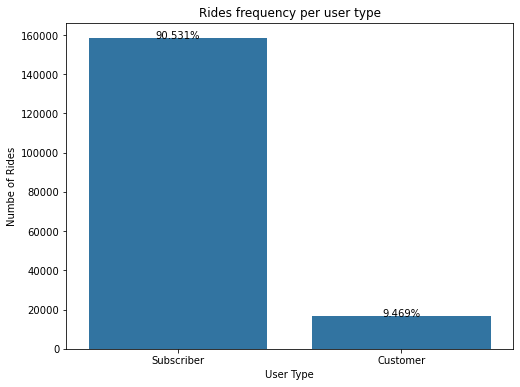

In [12]:
fig = plt.figure(figsize=[8,6])

color = sb.color_palette()[0]
ax = sb.countplot(data = bikes_df_clean, x = 'user_type', color = color, 
             order = bikes_df_clean.user_type.value_counts().index);
total = len(bikes_df_clean)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Rides frequency per user type')
plt.ylabel('Numbe of Rides')
plt.xlabel('User Type')
plt.show();

## Rides Frequency per member gender

Majority of the users are Male with over 74.5% as compared to Female with ~23% and 2% of other gender

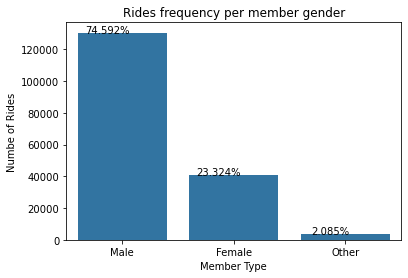

In [13]:
# Rides frequency per member gender
color = sb.color_palette()[0]
ax = sb.countplot(data = bikes_df_clean, x = 'member_gender', color = color, 
             order = bikes_df_clean.member_gender.value_counts().index);
total = len(bikes_df_clean)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/3
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Rides frequency per member gender')
plt.ylabel('Numbe of Rides')
plt.xlabel('Member Type')
plt.show();

In [17]:
!jupyter nbconvert Part_II_Ford_GoBike_System_Data_Presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Ford_GoBike_System_Data_Presentation.ipynb to slides
[NbConvertApp] Writing 647426 bytes to Part_II_Ford_GoBike_System_Data_Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Ford_GoBike_System_Data_Presentation.slides.html
Use Control-C to stop this server
^C

Interrupted
